In [ ]:
from osgeo import gdal

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install earthengine-api

In [ ]:
!earthengine authenticate

Instructions for updating:
non-resource variables are not supported in the long term
To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=kip-KpIlSs_aVthpQHZT_rZpw2c46qduubcmHtgm8t0&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AX4XfWjWiqiLf4HHx6uPDkay1rEuEkAgC9jfjDDEVq1xA3m-D5fGTGr65zo

Successfully saved authorization token.


In [ ]:
import ee
ee.Initialize()

In [ ]:
import pandas as pd
centroid_csv_path = '/content/gdrive/MyDrive/all_data.csv'
df = pd.read_csv(centroid_csv_path)


In [ ]:
df.set_index('HV001')
df.head()

,Unnamed: 0,HV001,Latitude,Longitude,HV270
0,0,1.0,27.090887,-13.417127,3.0
1,1,2.0,27.157745,-13.189701,5.0
2,2,3.0,26.742351,-11.681967,4.0
3,3,4.0,26.762514,-11.652784,3.0
4,4,5.0,29.170336,-9.718877,4.0


In [ ]:
df.count()

Unnamed: 0    480
HV001         480
Latitude      480
Longitude     480
HV270         480
dtype: int64

In [ ]:
!pip install geetools
import geetools

     |████████████████████████████████| 72 kB 1.2 MB/s 
     |████████████████████████████████| 219 kB 53.6 MB/s 
  Created wheel for geetools: filename=geetools-0.6.11-py3-none-any.whl size=90216 sha256=34aa79ca3945db2e77c25d1b2fa9b1141ef92e505f1e023b9d80da0a24a71237
  Stored in directory: /root/.cache/pip/wheels/b0/74/1d/5c16d985ea1f43ac4912e618ab848772c6d09fc8a5046adce2
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=d77bcb0959ce0ed4180be55c0cbea2d92d88e060f11ed0e22b5eb3c6575bc01f
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built geetools pyshp


In [ ]:
import ee
ee.Initialize()

In [ ]:
import geetools

In [ ]:
lng = -6.68032054918
lat = 34.2508768606

In [ ]:
site = ee.Geometry.Point([lng, lat]).buffer(2000)

In [ ]:
collection = ee.ImageCollection("COPERNICUS/S2").filterBounds(site).limit(1).select(['B2', 'B3', 'B4']).unitScale(0,255)

AttributeError: ignored

In [ ]:
bands = ['B2', 'B3', 'B4']
scale = 10
name_pattern = '3'
#{sat}_{system_date}_{WRS_PATH:%d}-{WRS_ROW:%d}_hello_world
#
date_pattern = 'ddMMMy' # dd: day, MMM: month (JAN), y: year
folder = 'RGB16'
data_type = 'uint16'
extra = dict(sat='SENTINEL')
region = site

In [ ]:
tasks = geetools.batch.Export.imagecollection.toDrive(
            collection=collection,
            folder=folder,
            region=site,
            namePattern=name_pattern,
            scale=scale,
            dataType=data_type,
            datePattern=date_pattern,
            extra=extra,
            verbose=True,
            maxPixels=int(1e13)
        )

exporting 3 to folder 'RGB2' in GDrive


In [ ]:
df.columns

Index(['Unnamed: 0', 'HV001', 'Latitude', 'Longitude', 'HV270'], dtype='object')

In [ ]:
#parameters
bands = ['B2', 'B3', 'B4']
scale = 10
#{sat}_{system_date}_{WRS_PATH:%d}-{WRS_ROW:%d}_hello_world
#
date_pattern = 'ddMMMy' # dd: day, MMM: month (JAN), y: year
folder = 'RGB16threebands'
data_type = 'uint16'
extra = dict(sat='SENTINEL2')

In [ ]:
tasks = geetools.batch.Export.imagecollection.toDrive(
            collection=collection,
            folder=folder,
            region=site,
            namePattern=name_pattern,
            scale=scale,
            dataType=data_type,
            datePattern=date_pattern,
            extra=extra,
            verbose=True,
            maxPixels=int(1e13)
        )

In [ ]:

for index, row in df.iterrows():
  ##begin info
  name = str(int(row['HV001']))
  lng = row['Longitude']
  lat = row['Latitude']
  name_pattern = name + '_{system_date}'

  ##end info
  ##begin download
  kmrange = 2000 #area surface around the center point 
  site = ee.Geometry.Point([lng, lat]).buffer(kmrange)
  collection = ee.ImageCollection("COPERNICUS/S2").filterBounds(site).limit(1).select(['B2', 'B3', 'B4'])
  region = site

  ##Download image
  tasks = geetools.batch.Export.imagecollection.toDrive(
            collection=collection,
            folder=folder,
            region=site,
            namePattern=name_pattern,
            scale=scale,
            dataType=data_type,
            datePattern=date_pattern,
            extra=extra,
            verbose=True,
            maxPixels=int(1e13)
        )


exporting 1_28Jun2015 to folder 'RGB16threebands' in GDrive
exporting 2_28Jun2015 to folder 'RGB16threebands' in GDrive
exporting 3_15Jul2015 to folder 'RGB16threebands' in GDrive
exporting 4_15Jul2015 to folder 'RGB16threebands' in GDrive
exporting 5_15Jul2015 to folder 'RGB16threebands' in GDrive
exporting 6_15Jul2015 to folder 'RGB16threebands' in GDrive
exporting 7_15Jul2015 to folder 'RGB16threebands' in GDrive
exporting 8_15Jul2015 to folder 'RGB16threebands' in GDrive
exporting 9_12Jul2015 to folder 'RGB16threebands' in GDrive
exporting 10_12Jul2015 to folder 'RGB16threebands' in GDrive
exporting 11_12Jul2015 to folder 'RGB16threebands' in GDrive
exporting 12_12Jul2015 to folder 'RGB16threebands' in GDrive
exporting 13_12Jul2015 to folder 'RGB16threebands' in GDrive
exporting 14_12Jul2015 to folder 'RGB16threebands' in GDrive
exporting 15_12Jul2015 to folder 'RGB16threebands' in GDrive
exporting 16_12Jul2015 to folder 'RGB16threebands' in GDrive
exporting 17_12Jul2015 to folder 

In [ ]:
!pip install rasterio

In [ ]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt


In [ ]:
imgspath = '/content/gdrive/MyDrive/RGB16threebands'


In [ ]:
from pathlib import Path

In [ ]:
p = Path(imgspath)
fp = p/'100_12Jul2015.tif'

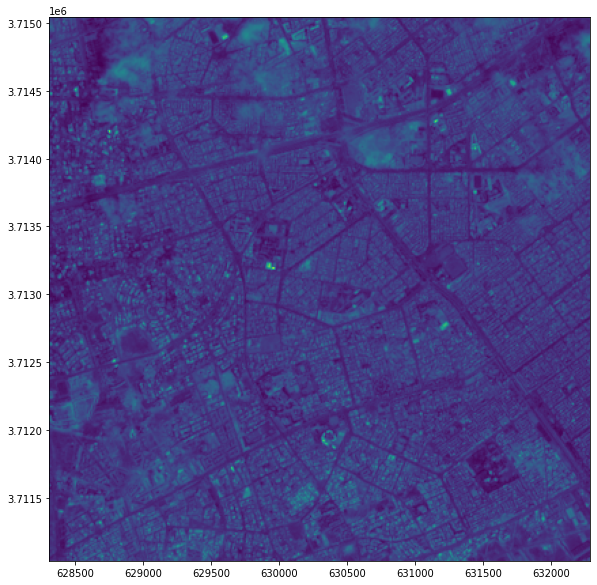

In [ ]:
img = rasterio.open(fp)
plt.figure(figsize = (20,10))
show(img)

In [ ]:
fp = str(fp).split('.')[0]
fp


'/content/gdrive/MyDrive/RGB16threebands/100_12Jul2015'

In [ ]:
!gdal_translate -of JPEG -scale -co worldfile=yes {fp}.tif output.jpg

ERROR 4: /content/gdrive/MyDrive/RGB16threebands/100_12Jul2015.tif: No such file or directory


drive  gdrive  sample_data
drive  gdrive  sample_data


In [ ]:
df['HV270'] = df['HV270'].apply(int)

In [ ]:
import os

In [ ]:
for fp in p.iterdir():
  fp2 = os.path.basename(str(fp))
  id = int(fp2.split('_')[0])
  c = df[df['HV001'] == id]['HV270'].values[0]
  #print(id,c)
  source = fp
  dest = '/content/gdrive/MyDrive/TD3BRGB/classes/{}/{}.tif'.format(str(c),str(id))
  print(dest)
  os.replace(source, dest)

/content/gdrive/MyDrive/TD3BRGB/classes/3/1.tif
/content/gdrive/MyDrive/TD3BRGB/classes/5/2.tif
/content/gdrive/MyDrive/TD3BRGB/classes/4/3.tif
/content/gdrive/MyDrive/TD3BRGB/classes/3/4.tif
/content/gdrive/MyDrive/TD3BRGB/classes/4/6.tif
/content/gdrive/MyDrive/TD3BRGB/classes/4/7.tif
/content/gdrive/MyDrive/TD3BRGB/classes/4/8.tif
/content/gdrive/MyDrive/TD3BRGB/classes/5/9.tif
/content/gdrive/MyDrive/TD3BRGB/classes/5/10.tif
/content/gdrive/MyDrive/TD3BRGB/classes/4/5.tif
/content/gdrive/MyDrive/TD3BRGB/classes/5/11.tif
/content/gdrive/MyDrive/TD3BRGB/classes/3/13.tif
/content/gdrive/MyDrive/TD3BRGB/classes/2/14.tif
/content/gdrive/MyDrive/TD3BRGB/classes/5/12.tif
/content/gdrive/MyDrive/TD3BRGB/classes/3/15.tif
/content/gdrive/MyDrive/TD3BRGB/classes/2/16.tif
/content/gdrive/MyDrive/TD3BRGB/classes/3/17.tif
/content/gdrive/MyDrive/TD3BRGB/classes/3/18.tif
/content/gdrive/MyDrive/TD3BRGB/classes/4/19.tif
/content/gdrive/MyDrive/TD3BRGB/classes/5/20.tif
/content/gdrive/MyDrive/TD3BR

In [ ]:
df[df['HV001'] == 4]['HV270'].values[0]

3.0

In [ ]:
#cloudy image
#fp = '/content/gdrive/MyDrive/TD3BRGB/classes/5/104.tif'

In [ ]:
fp = '/content/gdrive/MyDrive/TD3BRGB/classes/5/175.tif'

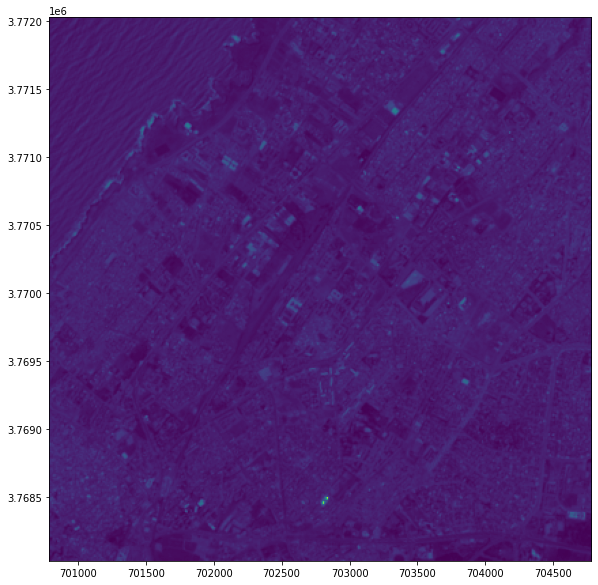

In [ ]:
img = rasterio.open(fp)
plt.figure(figsize = (20,10))
show(img)

In [ ]:
df.HV270.unique()

array([3, 5, 4, 2, 1])

In [ ]:
import os.path
from os import path
drivepath = '/content/drive/MyDrive/TD3BRGB'
unique_list = df.HV270.unique()
for c in unique_list:
  to_create = '/content/drive/MyDrive/TD3BRGB/classes/{}'.format(str(c))
  if path.exists(to_create) == False:
    os.mkdir(to_create)

In [ ]:
for l in p.iterdir():
  print(l)

OSError: ignored